In the following analysis we used the public dataset:

Single-cell gene profiling defines differential progenitor subclasses in mammalian neurogenesis
Ayano Kawaguchi, Tomoko Ikawa, Takeya Kasukawa, Hiroki R. Ueda, Kazuki Kurimoto, Mitinori Saitou, Fumio Matsuzaki
Development 2008 
http://dev.biologists.org/content/135/18/3113

Processed data was downloaded from GEO website: https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE10881

In [1]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd 
import seaborn as sns
from sklearn.decomposition import PCA

%matplotlib inline
sns.set_style('white')
sns.set_context('notebook', font_scale=1.7, rc={'lines.linewidth': 1.3})

# plot 2D PCA representation of the data
def dimensional_reduction(D, pc=[0,1], c='g', clabel=None, cbar=True, clim=None, xticks=[], yticks=[], 
                          cmap='YlGnBu', fs=[8,5], ms=200, marker=None, label=None, ax=None):
    if ax==None:
        f = plt.subplots(1, 1, figsize=(fs[0], fs[1]), sharex=True, sharey=True)
    X = PCA(n_components=3).fit(D.T).transform(D.T)

    im = plt.scatter(X[:,pc[0]], X[:,pc[1]], c=c, cmap=cmap, marker='o', s=ms, alpha=0.9)
    if label!=None:
        plt.legend(loc='center left', bbox_to_anchor=(1, 0.8))
    if cbar:
        cbar = plt.colorbar(im, orientation='vertical')
        if clabel!=None:
            if clim!=None:
                plt.clim([clim[0], clim[1]])
            else:
                plt.clim([np.min(c), np.max(c)])
            cbar.set_label(clabel)
    if xticks!=None:
        plt.xticks(xticks)
    if yticks!=None:
        plt.yticks(yticks)
        
# calculate the expression of a list of genes defined in list_genes in the log2(X+1) scale        
def get_expression(D, list_genes):
    D = 2**D - 1.0
    out = np.sum( [D.loc[list_genes[i]].values for i in range(len(list_genes))], axis=0)
    return np.log2(np.array(out) + 1.0) 

In [2]:
D = {}
D['info']  = pd.read_csv('../data/Affy_430_2.txt', index_col=0, header=0, sep='\t')
D['data']  = pd.read_csv('../data/GSE10881_series_matrixE14.txt', index_col=0, header=0, sep='\t')
# Using log2 scale, and adding 1.0 to avoid -inf
D['data'] = D['data'].drop('!series_matrix_table_end')
D['data']  = np.log2(D['data']+1.0)
D['data'].head()

,GSM275695,GSM275696,GSM275697,GSM275698,GSM275699,GSM275700,GSM275701,GSM275702,GSM275703,GSM275704,...,GSM275755,GSM275756,GSM275757,GSM275758,GSM275759,GSM275760,GSM275761,GSM275762,GSM275763,GSM275764
ID_REF,,,,,,,,,,,,,,,,,,,,,
1415670_at,3.057391,3.037047,10.849358,3.000058,4.375345,9.765821,9.152318,8.830512,9.735360,3.335658,...,8.205065,3.449820,3.486997,2.980921,7.314352,2.944066,3.703566,8.945447,8.994235,3.591799
1415671_at,5.261234,9.979954,11.229912,10.725247,10.324698,9.504424,10.867943,11.311419,10.159972,10.967313,...,6.993539,7.064387,4.321762,9.981596,11.154432,3.853327,9.627087,8.327678,12.002063,10.829128
1415672_at,10.426695,8.064139,11.461157,10.999732,10.051549,11.077410,9.516374,10.220064,10.047083,11.641302,...,10.742335,10.481043,10.629129,10.996714,11.395052,10.277613,10.578703,9.664245,11.862037,10.721791
1415673_at,9.755328,10.944163,10.989522,4.073555,9.443252,9.635907,9.542279,8.978118,9.198703,9.130594,...,10.873183,8.398992,10.919415,10.213359,0.531114,11.018124,10.473269,10.346093,6.576678,10.167067
1415674_a_at,2.863274,9.790306,10.105882,8.731166,9.925617,5.814763,8.322383,9.932643,9.483245,3.576183,...,10.175138,9.130782,8.791013,9.334206,10.084755,8.953545,9.992910,8.533376,10.451015,8.000901


In [3]:
D['info'].head()

,Sequence ID,MGI ID,Gene Symbol,Gene Name,Chromosome,Start Coordinate,End Coordinate,Strand
Probeset ID,,,,,,,,
1415670_at,BC024686,MGI:1858696,Copg,"coatomer protein complex, subunit gamma",6,87837808.0,87863589.0,+
1415671_at,NM_013477,MGI:1201778,Atp6v0d1,"ATPase, H+ transporting, lysosomal V0 subunit D1",8,108048365.0,108089947.0,-
1415672_at,NM_020585,MGI:1931029,Golga7,"golgi autoantigen, golgin subfamily a, 7",8,24351825.0,24367546.0,-
1415673_at,NM_133900,MGI:97788,Psph,phosphoserine phosphatase,5,130271434.0,130285320.0,-
1415674_a_at,NM_021789,MGI:1926211,Trappc4,trafficking protein particle complex 4,9,44211844.0,44215631.0,-


In [4]:
D['info']  = pd.read_csv('../data/Affy_430_2.txt', index_col=0, header=0, sep='\t')
D['info'][D['info']['Gene Symbol']=='Id2'].index


#'RG' :  ['SLC1A3','SOX2','PAX6','PDGFD','GLI3']
#   ,'IP' :  ['EOMES', 'ELAVL4', 'NEUROG1', 'NEUROD1', 'NEUROD4','PPP1R17','PENK']

Index([u'1422537_a_at', u'1453596_at'], dtype='object', name=u'Probeset ID')

In [5]:
l_genes = []
for i in ['Golga7', 'Id2']:
    l_genes += list(D['info'][D['info']['Gene Symbol']==i].index)
l_genes

['1415672_at', '1422537_a_at', '1453596_at']

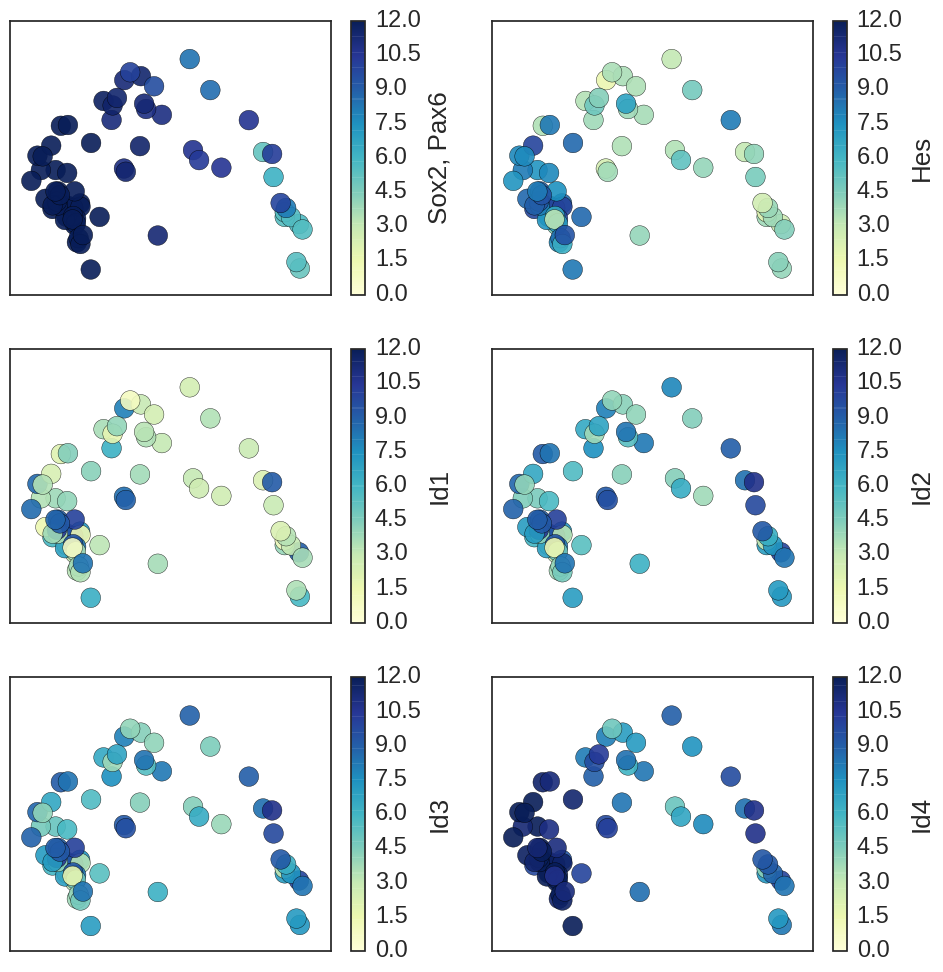

In [6]:
f = plt.subplots(2, 3, figsize=(5.7*2, 4*3), sharey=False)
ax = plt.subplot2grid((3, 2), (0, 0), colspan=1, rowspan=1)

l_genes = []
for i in ['Pax6', 'Sox2', 'Slc1a3', 'Pdfgd','Gli3']:
    l_genes += list(D['info'][D['info']['Gene Symbol']==i].index)
x = get_expression(D['data'], l_genes)
dimensional_reduction(D['data'], c=x,  xticks=[], yticks=[], ax=ax, clim=[0, 12], clabel='Sox2, Pax6')

ax = plt.subplot2grid((3, 2), (0, 1), colspan=1, rowspan=1)
l_genes = []
for i in ['Hes1', 'Hes5']:
    l_genes += list(D['info'][D['info']['Gene Symbol']==i].index)
x = get_expression(D['data'], l_genes)
dimensional_reduction(D['data'], c=x,  xticks=[], yticks=[], ax=ax, clim=[0, 12], clabel='Hes')

ax = plt.subplot2grid((3, 2), (1, 0), colspan=1, rowspan=1)
l_genes = []
for i in ['Id1']:
    l_genes += list(D['info'][D['info']['Gene Symbol']==i].index)
x = get_expression(D['data'], l_genes)
dimensional_reduction(D['data'], c=x,  xticks=[], yticks=[], ax=ax, clim=[0, 12], clabel='Id1')

ax = plt.subplot2grid((3, 2), (1, 1), colspan=1, rowspan=1)
for i in ['Id2']:
    l_genes += list(D['info'][D['info']['Gene Symbol']==i].index)
x = get_expression(D['data'], l_genes)
dimensional_reduction(D['data'], c=x,  xticks=[], yticks=[], ax=ax, clim=[0, 12], clabel='Id2')

ax = plt.subplot2grid((3, 2), (2, 0), colspan=1, rowspan=1)
for i in ['Id3']:
    l_genes += list(D['info'][D['info']['Gene Symbol']==i].index)
x = get_expression(D['data'], l_genes)
dimensional_reduction(D['data'], c=x,  xticks=[], yticks=[], ax=ax, clim=[0, 12], clabel='Id3')

ax = plt.subplot2grid((3, 2), (2, 1), colspan=1, rowspan=1)
for i in ['Id4']:
    l_genes += list(D['info'][D['info']['Gene Symbol']==i].index)
x = get_expression(D['data'], l_genes)
dimensional_reduction(D['data'], c=x,  xticks=[], yticks=[], ax=ax, clim=[0, 12], clabel='Id4')
plt.savefig('../figures/MouseEmbryo_IDs.pdf', format='pdf')

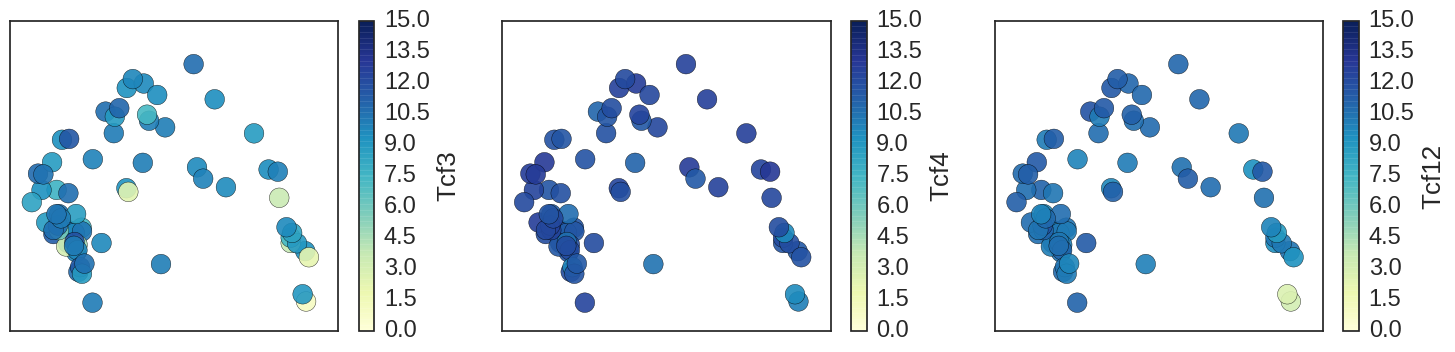

In [7]:
f = plt.subplots(1, 3, figsize=(6*3, 4), sharey=False)
ax = plt.subplot2grid((1, 3), (0, 0), colspan=1, rowspan=1)

l_genes = []
for i in ['Tcf3']:
    l_genes += list(D['info'][D['info']['Gene Symbol']==i].index)
x = get_expression(D['data'], l_genes)
dimensional_reduction(D['data'], c=x,  xticks=[], yticks=[], ax=ax, clim=[0, 15], clabel='Tcf3')

ax = plt.subplot2grid((1, 3), (0, 1), colspan=1, rowspan=1)
l_genes = []
for i in ['Tcf4']:
    l_genes += list(D['info'][D['info']['Gene Symbol']==i].index)
x = get_expression(D['data'], l_genes)
dimensional_reduction(D['data'], c=x,  xticks=[], yticks=[], ax=ax, clim=[0, 15], clabel='Tcf4')

ax = plt.subplot2grid((1, 3), (0, 2), colspan=1, rowspan=1)
l_genes = []
for i in ['Tcf12']:
    l_genes += list(D['info'][D['info']['Gene Symbol']==i].index)
x = get_expression(D['data'], l_genes)
dimensional_reduction(D['data'], c=x,  xticks=[], yticks=[], ax=ax, clim=[0, 15], clabel='Tcf12')


(0, 14)

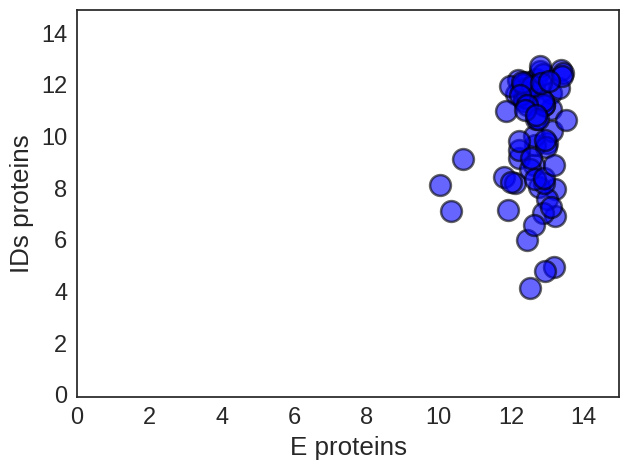

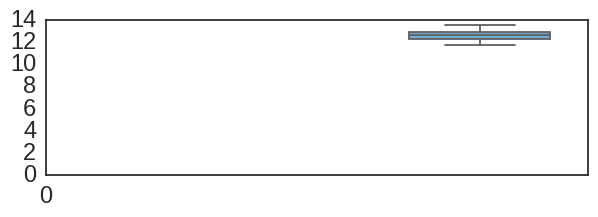

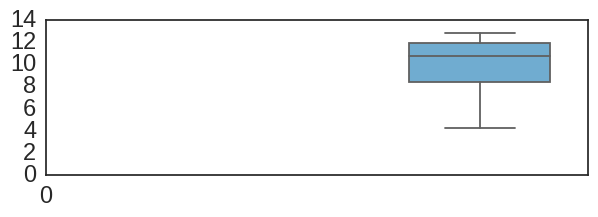

In [8]:
f = plt.subplots(1, 1, figsize=(7, 5))
ax = plt.subplot2grid((1, 1), (0, 0), colspan=1, rowspan=1)

l_genes = []
for i in ['Tcf3', 'Tcf4', 'Tcf12']:
    l_genes += list(D['info'][D['info']['Gene Symbol']==i].index)
x = get_expression(D['data'], l_genes)

l_genes = []
for i in ['Id1', 'Id2', 'Id3', 'Id4']:
    l_genes += list(D['info'][D['info']['Gene Symbol']==i].index)
y = get_expression(D['data'], l_genes)


plt.plot(x[x*y>0], y[x*y>0], marker='o', color='b',lw=0.0, mew=1.8, ms=15, alpha=0.6)
plt.xlim([0,15])
plt.ylim([0,15])
plt.xlabel('E proteins')
plt.ylabel('IDs proteins')
#plt.savefig('../figures/ID_E_mousebrain.pdf', format='pdf')

f = plt.subplots(1, 1, figsize=(7, 2))
ax = plt.subplot2grid((1, 1), (0, 0), colspan=1, rowspan=1)
sns.boxplot(  data=[x[x*y>0]], palette='Blues', ax=ax,
              saturation=0.9, width=0.65, fliersize=0)
ax.set_xticks([-2, -1, 0])
plt.ylim([0, 14])
#plt.savefig('../figures/E_mousebrain_boxplot.pdf', format='pdf')

f = plt.subplots(1, 1, figsize=(7, 2))
ax = plt.subplot2grid((1, 1), (0, 0), colspan=1, rowspan=1)
sns.boxplot(  data=[y[x*y>0]], palette='Blues', ax=ax,
              saturation=0.9, width=0.65, fliersize=0)
ax.set_xticks([-2, -1, 0])
plt.ylim([0, 14])
#plt.savefig('../figures/ID_mousebrain_boxplot.pdf', format='pdf')